# BrightnessContrast Example

This example demonstrates usage of `brightness_contrast` operator.

## Brighness and Contrast Adjustment




In [1]:
#importing the required libraries 
from nvidia.dali import pipeline_def
import nvidia.dali.fn as fn       
import nvidia.dali.types as types
import matplotlib.pyplot as plt

batch_size = 10
image_filename = "data/images"

In [2]:
#Creating the Pipeline on CPU
@pipeline_def()
def bc_cpu_pipeline():
    files, labels = fn.readers.file(file_root=image_filename)
    images = fn.decoders.image(files)
    converted = fn.brightness_contrast(images, 
                                       brightness_shift=0.3,
                                       contrast=0.4,
                                       contrast_center=100)
    return images, converted

#Creating the Pipeline on GPU
@pipeline_def()
def bc_gpu_pipeline():
    files, labels = fn.readers.file(file_root=image_filename)
    images = fn.decoders.image(files, device='mixed')
    converted = fn.brightness_contrast(images,
                                    contrast=1.5,          # increase contrast
                                    brightness_shift = 1,  # invert...
                                    brightness=-1)         # ...colors
    return images, converted


In [3]:
#Creating a function for visulatisation of images 
def display(output, cpu=True):
    i = 2  # Tweak that to have various images from batch
    img1 = output[0].at(i) if cpu else output[0].as_cpu().at(i)
    img2 = output[1].at(i) if cpu else output[1].as_cpu().at(i)
    fig, ax = plt.subplots(1,2)
    ax[0].imshow(img1);
    ax[1].imshow(img2);

In [4]:
#Results on GPU
pipe_gpu = bc_gpu_pipeline(batch_size=batch_size, num_threads=1, device_id=0)
pipe_gpu.build()          


In [5]:
gpu_output = pipe_gpu.run()

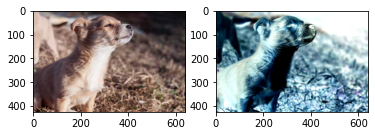

In [6]:
display(gpu_output, cpu=False)

In [7]:
#Results on CPU
pipe_cpu = bc_cpu_pipeline(batch_size=batch_size, num_threads=1, device_id=0)
pipe_cpu.build()          
cpu_output = pipe_cpu.run()

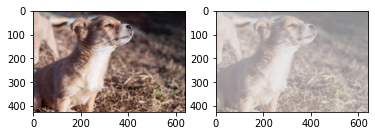

In [8]:
display(cpu_output)